In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from pickle import load

In [3]:
file='/Volumes/Data/tmp/orchids-models/orchids2019/mobilenet_v2_140_orchids52/11-15-2020-15-20-31-history-pretrain1'
file_to_load = '{}.pack'.format(file)
history = load(open(file_to_load, 'rb'))

In [6]:
train_loss = history['train_loss']
regularization_loss = history['reg_loss']
boundary_loss = history['b_loss']
total_loss = history['total_loss']
accuracy = history['accuracy']
validation_loss = history['val_loss']
validation_accuracy = history['val_accuracy']
num_of_data = len(accuracy)
epochs_range = range(num_of_data)

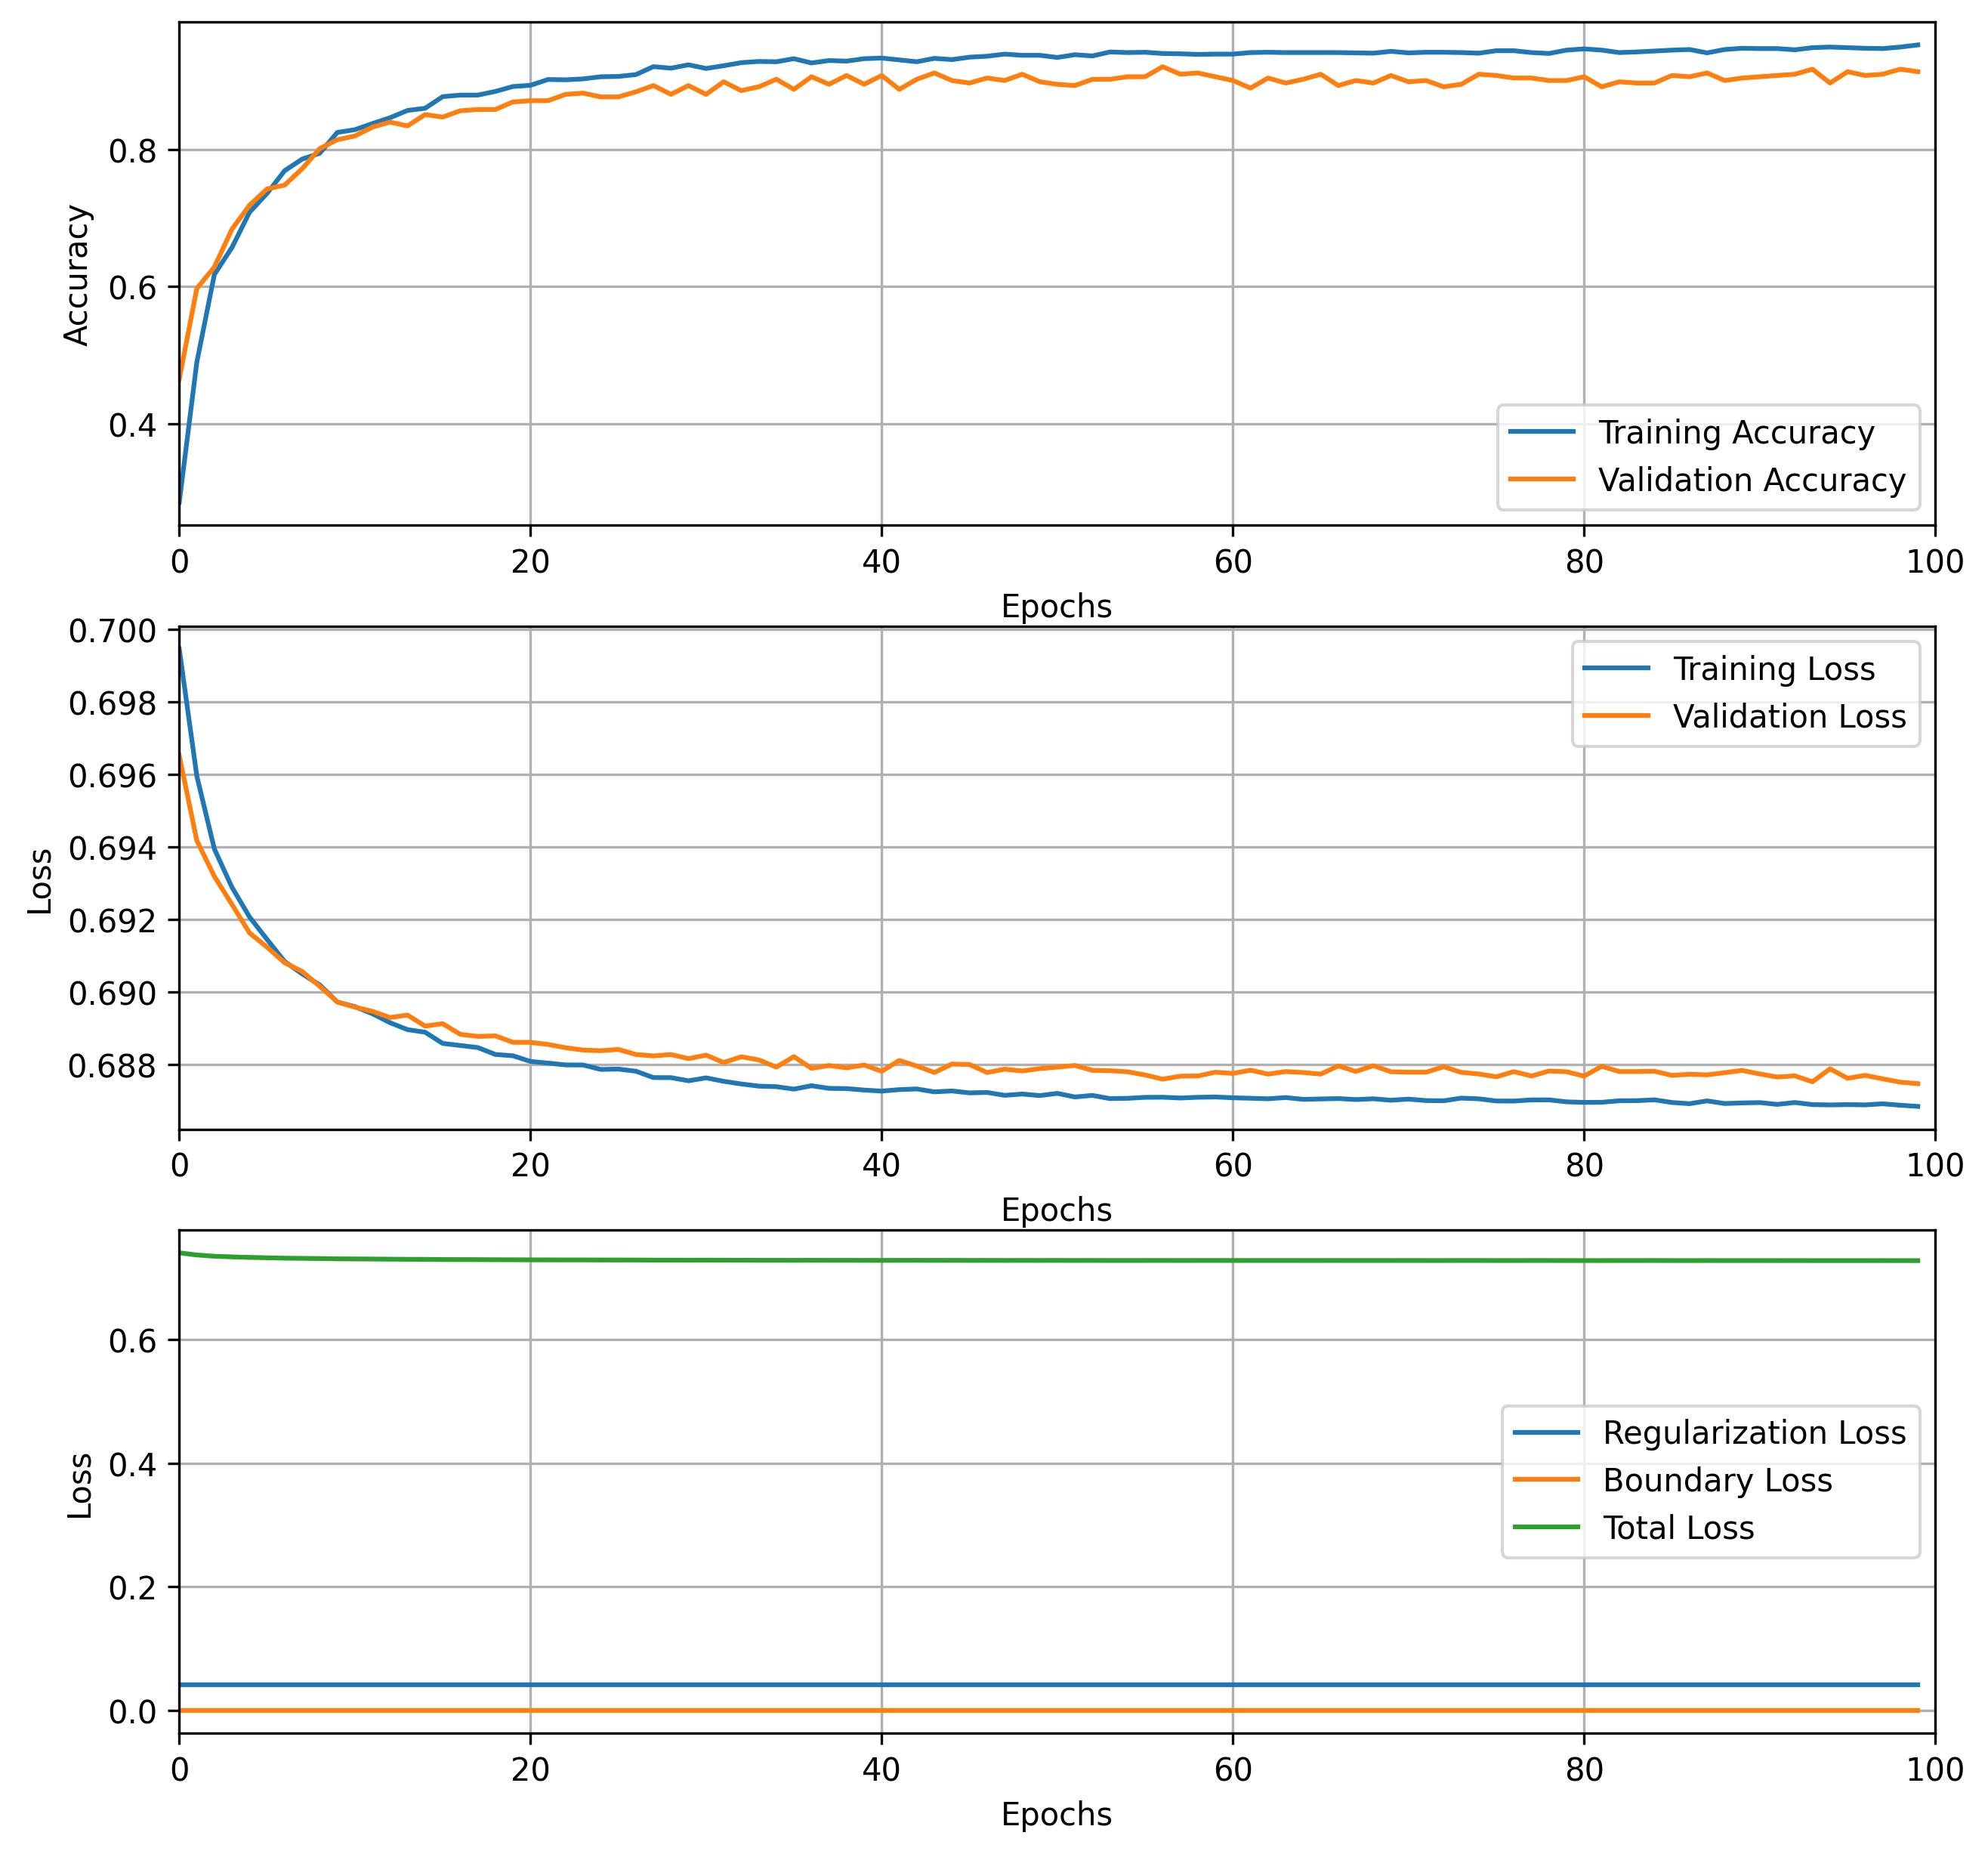

In [13]:
fig, axs = plt.subplots(3, 1, figsize=(10, 10), dpi=300)

axs[0].plot(epochs_range, accuracy, label='Training Accuracy')
axs[0].plot(epochs_range, validation_accuracy, label='Validation Accuracy')
axs[0].set_xlim(0, num_of_data)
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend(loc='lower right')
axs[0].grid(True)
axs[1].plot(epochs_range, train_loss, label='Training Loss')
axs[1].plot(epochs_range, validation_loss, label='Validation Loss')
axs[1].set_xlim(0, num_of_data)
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend(loc='upper right')
axs[1].grid(True)
axs[2].plot(epochs_range, regularization_loss, label='Regularization Loss')
axs[2].plot(epochs_range, boundary_loss, label='Boundary Loss')
axs[2].plot(epochs_range, total_loss, label='Total Loss')
axs[2].set_xlim(0, num_of_data)
axs[2].set_xlabel('Epochs')
axs[2].set_ylabel('Loss')
axs[2].legend(loc='center right')
axs[2].grid(True)